In [1]:
from windwave.fio import read_fields_2D
import numpy as np
import xarray as xr
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('./grl.mplstyle')

%load_ext autoreload
%autoreload 3

In [52]:
# path = '/home/ctrsp-2024/jiarongw/outputs/test_NWP_ZPG/'
# times = [38.51,39]
# ds_NWP_sub = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

####### NWP ##########
path = '/home/ctrsp-2024/jiarongw/outputs/test_NWP_ZPG/'
times = np.arange(41.5,49.5,0.1)
ds_NWP = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

####### NWP ##########
path = '/home/ctrsp-2024/jiarongw/outputs/test_NWP_precursor/'
times = np.arange(45,45.4,0.1)
ds_NWP_verify = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

####### Original case (stationary part) ########
path = '/home/ctrsp-2024/jiarongw/outputs/test/'
times = np.arange(38.5,46.3,0.1)
ds = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

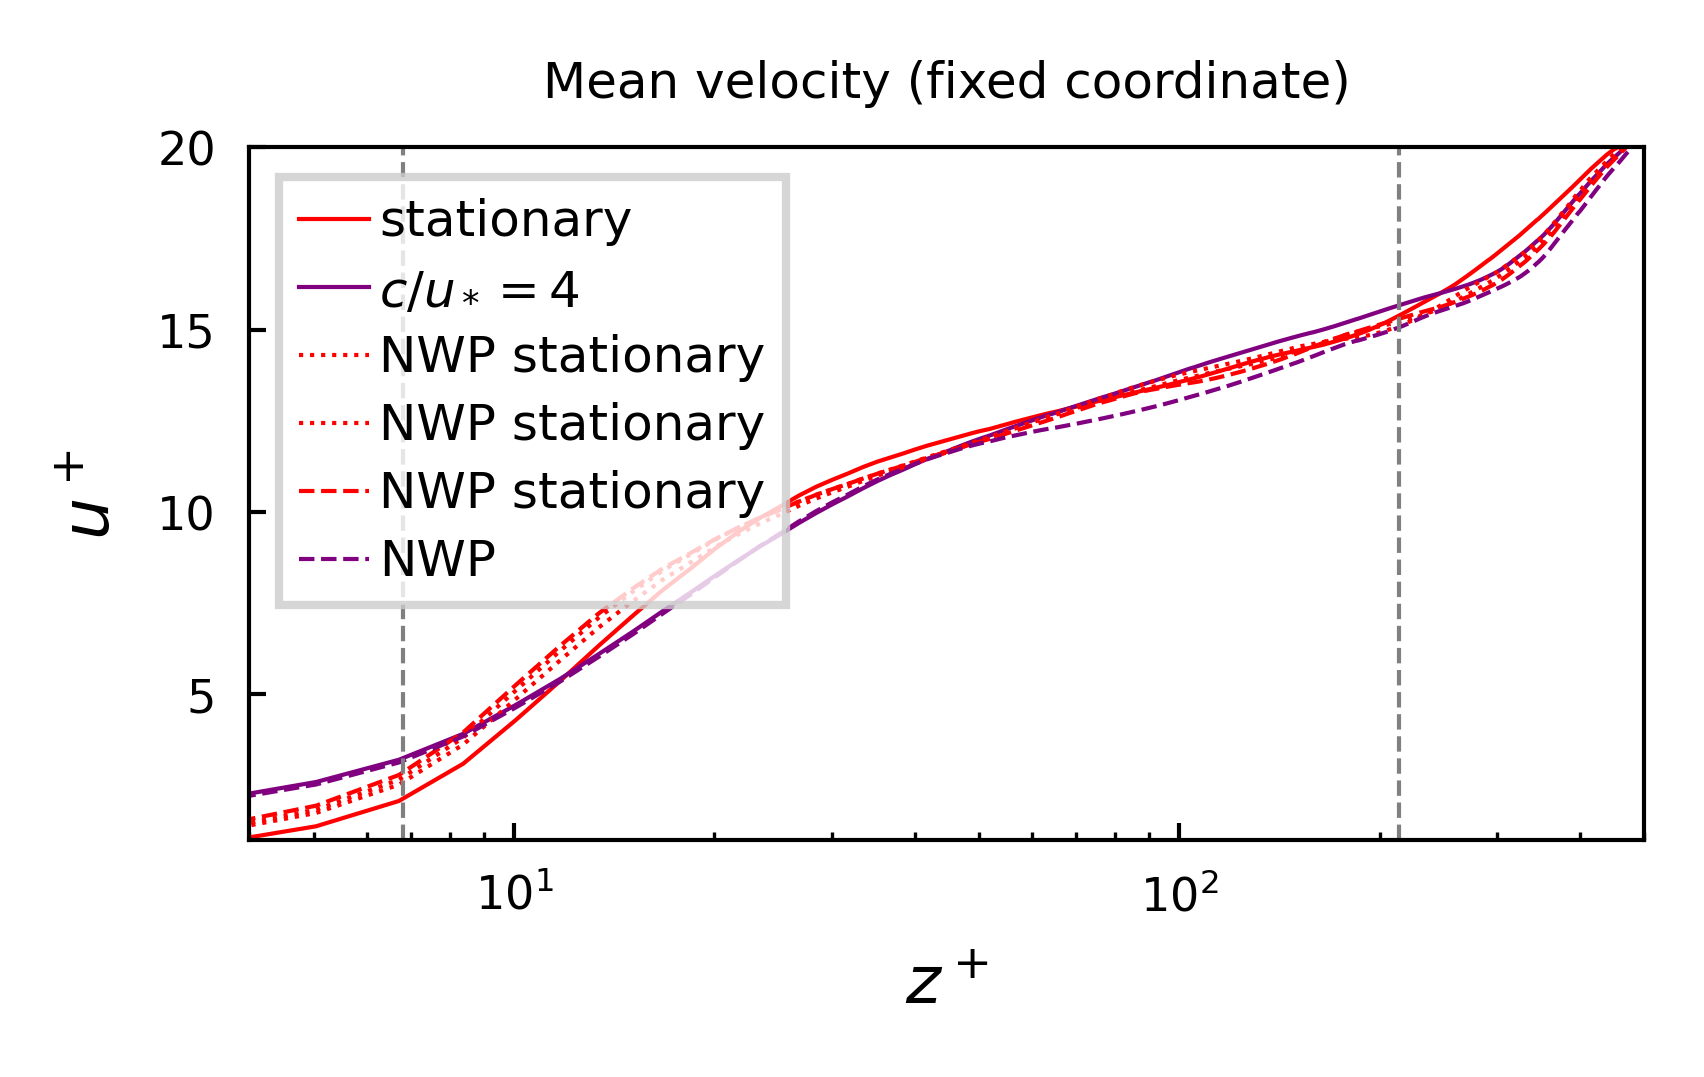

In [5]:
# Select the data within the time range
ds_sub1 = ds.ux.sel(t=slice(38.5,40))
ds_sub2 = ds.ux.sel(t=slice(44,46))
zwall = (2*np.pi-1)/720
ustar = 0.25
fig = plt.figure(figsize=[3,1.5])
plt.plot((ds.y-1)/zwall, ds_sub1.mean(dim=['x','t'])/ustar, color='red', label='stationary')
plt.plot((ds.y-1)/zwall, ds_sub2.mean(dim=['x','t'])/ustar, color='purple', label='$c/u_*=4$')

# NWP
ds_NWP_sub0 = ds_NWP.ux.sel(t=slice(42,43))
plt.plot((ds.y-1)/zwall, ds_NWP_sub0.mean(dim=['x','t'])/ustar, ':', color='red', label='NWP stationary')

ds_NWP_sub1 = ds_NWP.ux.sel(t=slice(43,44))
plt.plot((ds.y-1)/zwall, ds_NWP_sub1.mean(dim=['x','t'])/ustar, ':', color='red', label='NWP stationary')
ds_NWP_sub2 = ds_NWP.ux.sel(t=slice(44,45))
plt.plot((ds.y-1)/zwall, ds_NWP_sub2.mean(dim=['x','t'])/ustar, '--', color='red', label='NWP stationary')
ds_NWP_moving = ds_NWP.ux.sel(t=slice(48,49.5))
plt.plot((ds.y-1)/zwall, ds_NWP_moving.mean(dim=['x','t'])/ustar, '--', color='purple', label='NWP')


plt.axvline(x=0.2/4/zwall, linestyle='--', c='gray')
plt.axvline(x=2*np.pi/4/zwall, linestyle='--', c='gray')
plt.xlim([4,500]); plt.ylim([1,20])
plt.xscale('log')
plt.xlabel('$z^+$'); plt.ylabel('$u^+$')
plt.title('Mean velocity (fixed coordinate)', fontsize=6)
plt.legend(fontsize=6)

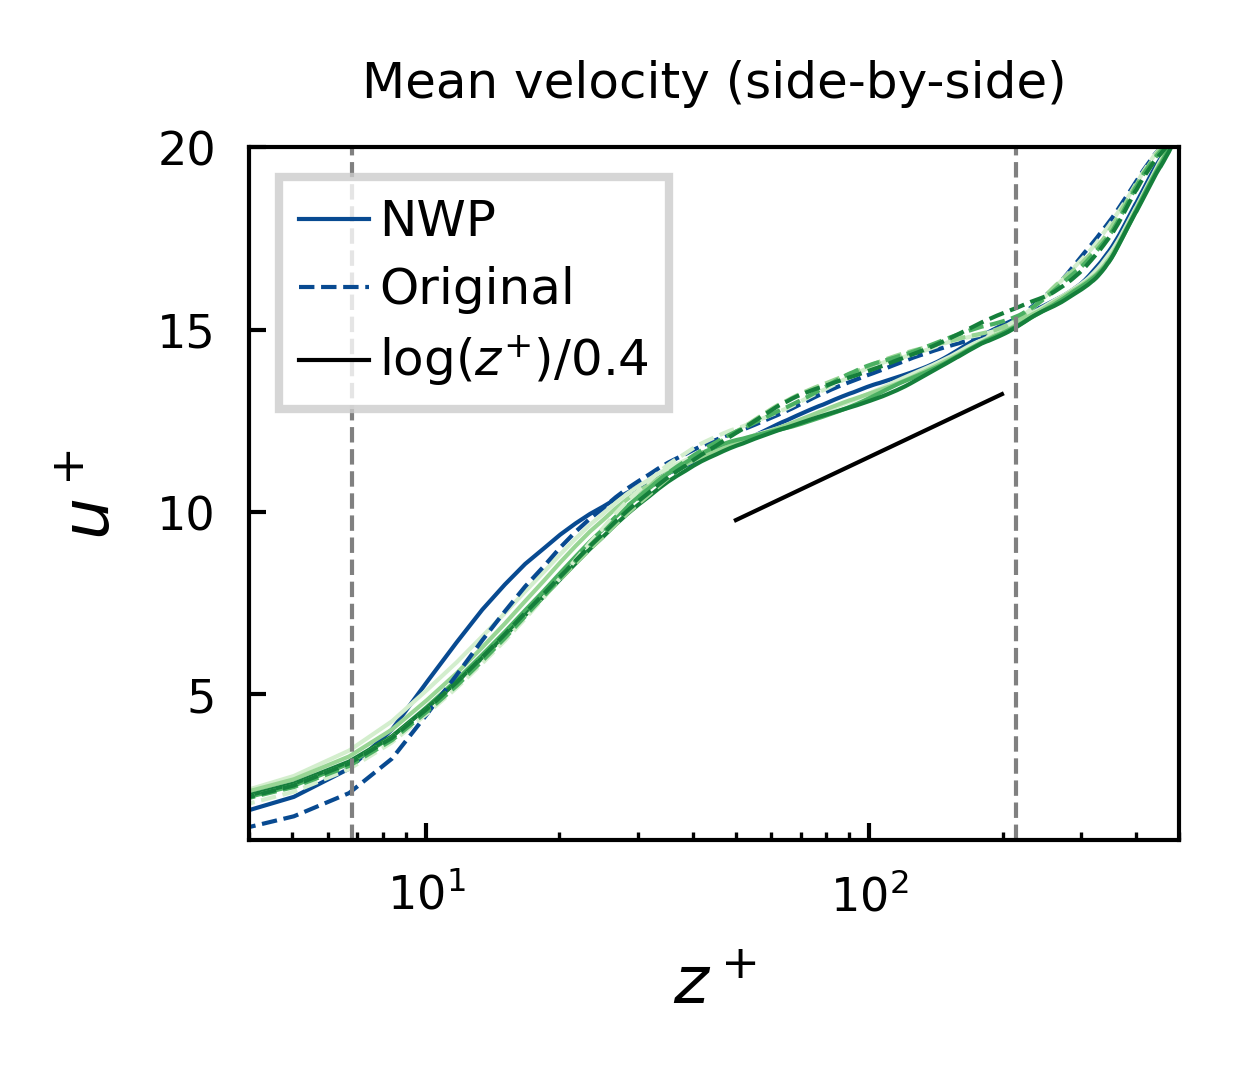

In [50]:
fig = plt.figure(figsize=[2,1.5])

times = np.arange(45,46)
for i,time in enumerate(times):
    plt.plot((ds_NWP.y-1)/zwall, ds_NWP.ux.sel(t=time,method='nearest').mean(dim=['x'])/ustar, '-', 
             color=plt.get_cmap('Blues')(0.9), label='NWP')

times = np.arange(46,50)
for i,time in enumerate(times):
    plt.plot((ds_NWP.y-1)/zwall, ds_NWP.ux.sel(t=time,method='nearest').mean(dim=['x'])/ustar, '-', 
             color=plt.get_cmap('Greens')((i+1)/5))

times = np.arange(40,41)
for i,time in enumerate(times):
    plt.plot((ds.y-1)/zwall, ds.ux.sel(t=time,method='nearest').mean(dim=['x'])/ustar, '--', 
             color=plt.get_cmap('Blues')(0.9), label='Original')

times = np.arange(41,45)
for i,time in enumerate(times):
    plt.plot((ds.y-1)/zwall, ds.ux.sel(t=time,method='nearest').mean(dim=['x'])/ustar, '--', 
             color=plt.get_cmap('Greens')((i+1)/5))


x = np.arange(50,200)
y = np.log(x)/0.4
plt.plot(x, y, c='k', label='$\log(z^{+})/0.4$')
plt.axvline(x=0.2/4/zwall, linestyle='--', c='gray')
plt.axvline(x=2*np.pi/4/zwall, linestyle='--', c='gray')
plt.xlim([4,500]); plt.ylim([1,20])
plt.xscale('log')
plt.xlabel('$z^+$'); plt.ylabel('$u^+$')
plt.title('Mean velocity (side-by-side)', fontsize=6)
plt.legend(fontsize=6)



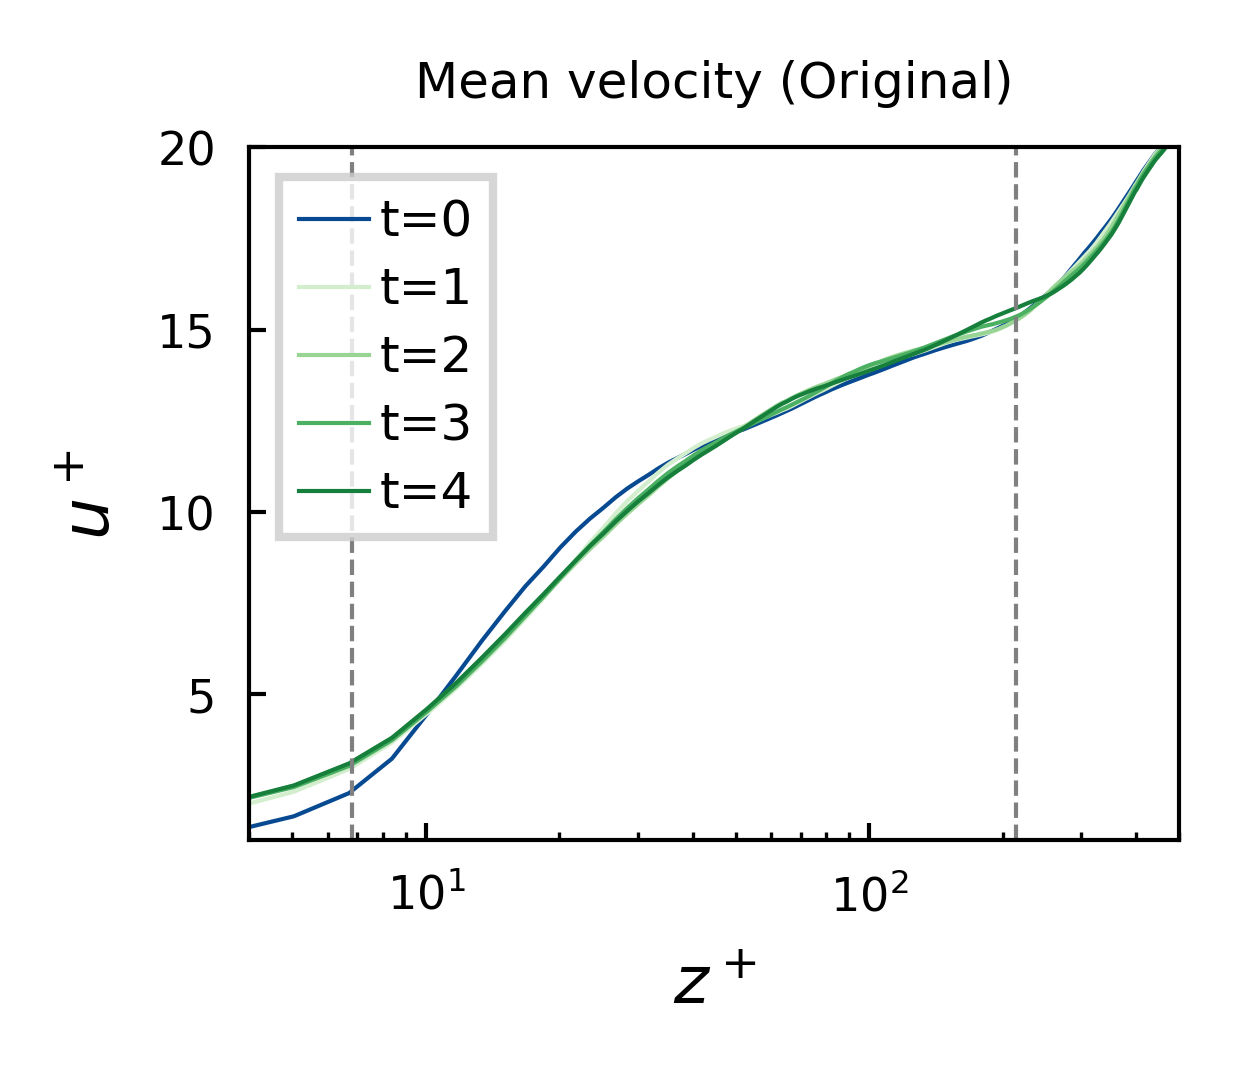

In [40]:
fig = plt.figure(figsize=[2,1.5])

times = np.arange(40,41)
for i,time in enumerate(times):
    plt.plot((ds.y-1)/zwall, ds.ux.sel(t=time,method='nearest').mean(dim=['x'])/ustar, '-', 
             color=plt.get_cmap('Blues')(0.9), label='t=%g' %(time-40))

times = np.arange(41,45)
for i,time in enumerate(times):
    plt.plot((ds.y-1)/zwall, ds.ux.sel(t=time,method='nearest').mean(dim=['x'])/ustar, '-', 
             color=plt.get_cmap('Greens')((i+1)/5), label='t=%g' %(time-40))

plt.axvline(x=0.2/4/zwall, linestyle='--', c='gray')
plt.axvline(x=2*np.pi/4/zwall, linestyle='--', c='gray')
plt.xlim([4,500]); plt.ylim([1,20])
plt.xscale('log')
plt.xlabel('$z^+$'); plt.ylabel('$u^+$')
plt.title('Mean velocity (Original)', fontsize=6)
plt.legend(fontsize=6)

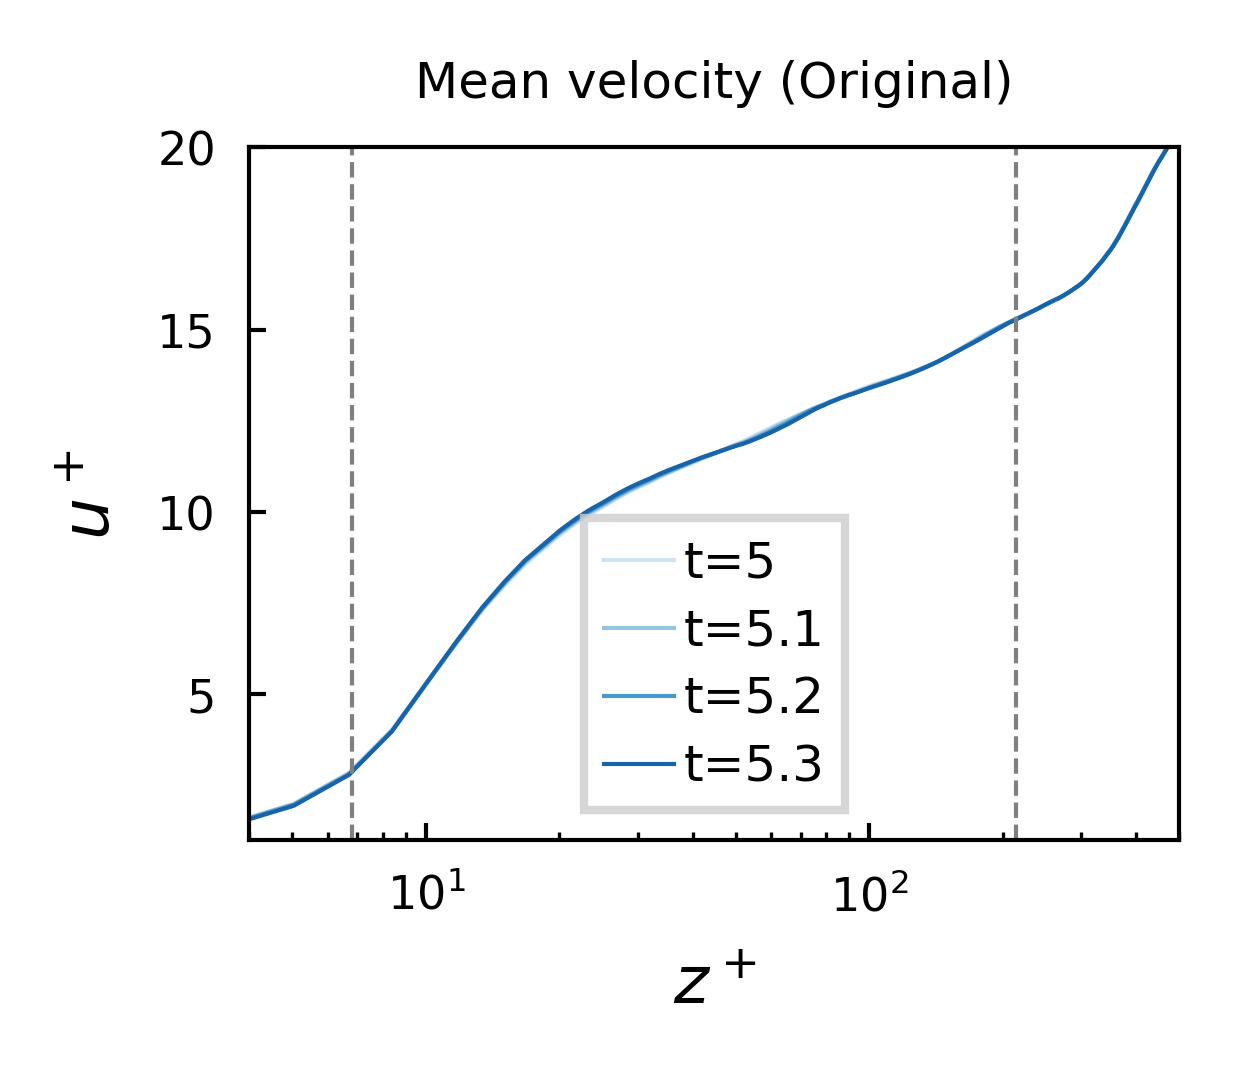

In [54]:
fig = plt.figure(figsize=[2,1.5])


for i,time in enumerate(ds_NWP_verify.t):
    plt.plot((ds_NWP_verify.y-1)/zwall, ds_NWP_verify.ux.sel(t=time,method='nearest').mean(dim=['x'])/ustar, '-', 
             color=plt.get_cmap('Blues')((i+1)/5), label='t=%g' %(time-40))


plt.axvline(x=0.2/4/zwall, linestyle='--', c='gray')
plt.axvline(x=2*np.pi/4/zwall, linestyle='--', c='gray')
plt.xlim([4,500]); plt.ylim([1,20])
plt.xscale('log')
plt.xlabel('$z^+$'); plt.ylabel('$u^+$')
plt.title('Mean velocity (Original)', fontsize=6)
plt.legend(fontsize=6)